In [16]:
# initial setup
from sklearn.cluster import KMeans
import sklearn.datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import set_config
set_config(transform_output='pandas')

url = "/home/carlos/projects/ai/mlearning/titanic.csv"
raw = pd.read_csv(url)

raw


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
raw.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
raw.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
raw.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
def tweak_titanic(df):
    return (df.loc[:, ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare']]
       .dropna())

tweak_titanic(raw)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
885,886,0,3,39.0,0,5,29.1250
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
889,890,1,1,26.0,0,0,30.0000


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(tweak_titanic(raw))
X


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,-1.728532,-0.82702,0.911232,-0.530377,0.524570,-0.505895,-0.518978
1,-1.724670,1.20916,-1.476364,0.571831,0.524570,-0.505895,0.691897
2,-1.720808,1.20916,0.911232,-0.254825,-0.551703,-0.505895,-0.506214
3,-1.716946,1.20916,-1.476364,0.365167,0.524570,-0.505895,0.348049
4,-1.713084,-0.82702,0.911232,0.365167,-0.551703,-0.505895,-0.503850
...,...,...,...,...,...,...,...
885,1.689274,-0.82702,0.911232,0.640719,-0.551703,5.357890,-0.105320
886,1.693136,-0.82702,-0.282566,-0.185937,-0.551703,-0.505895,-0.410245
887,1.696998,1.20916,-1.476364,-0.737041,-0.551703,-0.505895,-0.088774
889,1.704722,1.20916,-1.476364,-0.254825,-0.551703,-0.505895,-0.088774


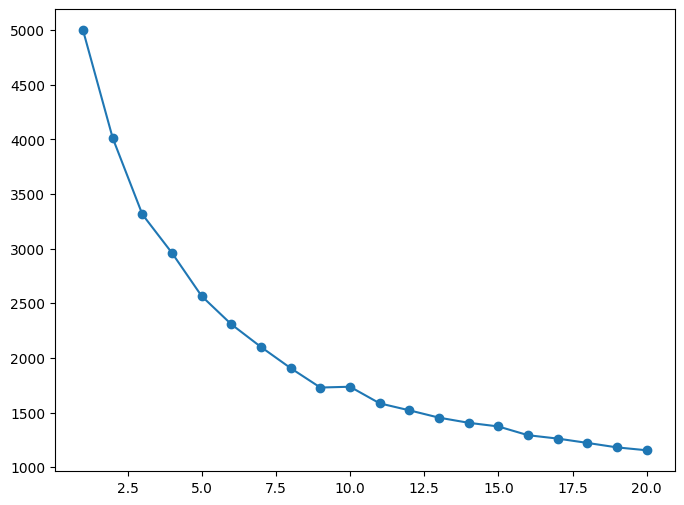

In [18]:
# elbow technique - basically we need to plot a graph with the inertia attribute and select the K from the elbow of the graph

inertias = []
for i in range(20):
    km = KMeans(n_clusters=i+1, n_init=1, max_iter=300, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,21), inertias, marker='o')


In [23]:
# final solution
km = KMeans(n_clusters=6, n_init='auto', max_iter=300, random_state=42)
km.fit(X)
label= km.predict(X)

(X.assign(cluster=label).groupby('cluster').agg('mean', numeric_only=True).T.style.background_gradient(cmap='RdBu', axis='columns'))

cluster,0,1,2,3,4,5
PassengerId,0.159050,-0.069771,-0.234652,0.023383,0.958770,-0.858428
Survived,0.734052,1.209160,-0.600778,0.560128,-0.827020,-0.827020
Pclass,-1.476364,0.294827,0.858175,-1.334600,0.540488,0.527770
Age,-0.119529,-0.629994,-0.959013,0.897973,0.014309,-0.017266
SibSp,0.273440,-0.115566,2.653199,-0.107740,-0.331100,-0.238605
Parch,1.096873,0.176297,2.230538,-0.264014,-0.403916,-0.321097
Fare,3.641016,-0.301639,-0.052214,0.446162,-0.415191,-0.395577
